In [141]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem.isri import ISRIStemmer
import nltk 
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdulrahman_1114\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdulrahman_1114\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abdulrahman_1114\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [142]:
# conda update --all

In [143]:
df = pd.read_csv("Restaurant_Reviews.tsv" , sep='\t')


In [144]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [146]:
df["Liked"].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

<Axes: xlabel='Liked', ylabel='count'>

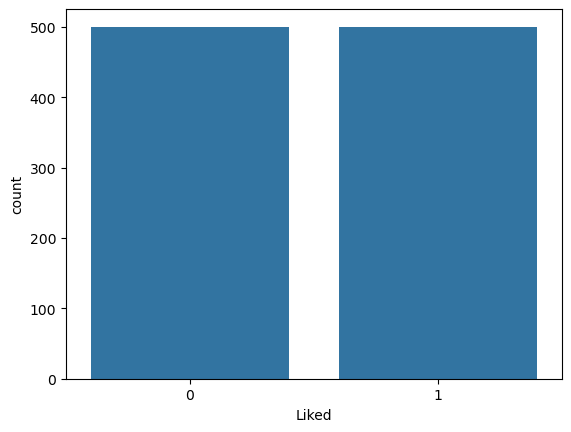

In [147]:
sns.countplot(x=df["Liked"])

In [148]:
px.pie(df, names="Liked", title="Distribution of Liked Data")

In [149]:
df["Review"].apply(len)

0       24
1       18
2       41
3       87
4       59
      ... 
995     66
996     24
997     50
998     91
999    134
Name: Review, Length: 1000, dtype: int64

In [150]:
df["re_let"] = df["Review"].apply(len)

In [151]:
df.head()

,Review,Liked,re_let
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [152]:
print(df["re_let"].idxmax())


985


In [153]:
print(df.iloc[df["re_let"].idxmax()])

Review    The problem I have is that they charge $11.99 ...
Liked                                                     0
re_let                                                  149
Name: 985, dtype: object


## cleaning

In [154]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [155]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [156]:
df_r = df['Review'][0]

In [157]:
s = re.sub('[^a-zA-Z0-9]', " ", df_r)
print(s)

Wow    Loved this place 


In [158]:
s = s.lower()
print(s)

wow    loved this place 


In [159]:
s = s.split()
print(s)

['wow', 'loved', 'this', 'place']


In [160]:
temp = []
for word in s :
    if word not in stopwords.words('english'):
        temp.append(word)
temp

['wow', 'loved', 'place']

In [161]:
s = ' '.join(temp)
s

'wow loved place'

In [162]:


stemmer = LancasterStemmer()
s = " ".join([stemmer.stem(word) for word in s.split()])
print(s)

wow lov plac


In [163]:

def preprocess_text(text):
    text = text.lower()
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords.words('english')]
    stemmer = LancasterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    processed_text = ' '.join(stemmed_words)
    return processed_text



In [164]:

df['text'] = df['Review'].apply(preprocess_text)


In [165]:
df.head()

,Review,Liked,re_let,text
0,Wow... Loved this place.,1,24,wow... lov place.
1,Crust is not good.,0,18,crust good.
2,Not tasty and the texture was just nasty.,0,41,tasty text nasty.
3,Stopped by during the late May bank holiday of...,1,87,stop lat may bank holiday rick stev recommend ...
4,The selection on the menu was great and so wer...,1,59,select menu gre prices.


In [166]:
pd.DataFrame(df['text'])

,text
0,wow... lov place.
1,crust good.
2,tasty text nasty.
3,stop lat may bank holiday rick stev recommend ...
4,select menu gre prices.
...,...
995,think food flav text lacking.
996,appetit inst gone.
997,overal impress would go back.
998,"whol expery underwhelming, think we'll go ninj..."


In [167]:
arabic_text = "مرحباً بالعالم! هذه جملة اختبار لمعالجة النصوص. أرقام مثل ١٢٣٤٥ أو رموز مثل $٪& تعتبر ضوضاء."


In [168]:
temp_ar = []
for word in arabic_text :
    if word not in stopwords.words('arabic'):
        temp_ar.append(word)
temp_ar

['ً',
 ' ',
 '!',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 '١',
 '٢',
 '٣',
 '٤',
 '٥',
 ' ',
 ' ',
 ' ',
 ' ',
 '$',
 '٪',
 '&',
 ' ',
 ' ',
 '.']

In [169]:
import re
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer

def preprocess_text_ar(text):

    text = re.sub(r'[\u064B-\u065F]', '', text)  
    text = re.sub(r'[إأآا]', 'ا', text)  
    text = re.sub(r'ة', 'ه', text)  
    text = re.sub(r'ى', 'ي', text)  
    text = re.sub(r'ؤ', 'و', text)  
    text = re.sub(r'[ء]', '', text)  


    text = text.lower()


    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\d+', '', text)  

    
    words = text.split()  

    
    arabic_stopwords = set(stopwords.words('arabic')) if 'arabic' in stopwords.fileids() else set(['في', 'من', 'على', 'إلى', 'عن', 'و', 'يا', 'لكن', 'هذا', 'ما'])
    filtered_words = [word for word in words if word not in arabic_stopwords]


    stemmer = ISRIStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    
    processed_text = ' '.join(stemmed_words)
    return processed_text


In [170]:
text = "مرحباً بالعالم! هذه جملة اختبار لمعالجة النصوص. أرقام مثل ١٢٣٤٥ أو رموز مثل $٪& تعتبر ضوضاء."
processed_text = preprocess_text_ar(text)
print(processed_text)


رحب علم جمل خبر علج نصص رقم او رمز عبر ضوض
